In [1]:
import import_ipynb
%run utils.ipynb


In [2]:
# Load the datasets
folder_path = "./CICIDS_2018/"
train_data, val_data, test_data = load_and_explore_datasets(folder_path)


C:\Users\Monet\AppData\Local\Temp\ipykernel_4932\1595736817.py:10: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(train_file)
C:\Users\Monet\AppData\Local\Temp\ipykernel_4932\1595736817.py:11: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  val_data = pd.read_csv(val_file)
C:\Users\Monet\AppData\Local\Temp\ipykernel_4932\1595736817.py:12: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22

Train Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11363101 entries, 0 to 11363100
Data columns (total 84 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           object 
 1   Protocol           object 
 2   Timestamp          object 
 3   Flow Duration      object 
 4   Tot Fwd Pkts       object 
 5   Tot Bwd Pkts       object 
 6   TotLen Fwd Pkts    object 
 7   TotLen Bwd Pkts    object 
 8   Fwd Pkt Len Max    object 
 9   Fwd Pkt Len Min    object 
 10  Fwd Pkt Len Mean   object 
 11  Fwd Pkt Len Std    object 
 12  Bwd Pkt Len Max    object 
 13  Bwd Pkt Len Min    object 
 14  Bwd Pkt Len Mean   object 
 15  Bwd Pkt Len Std    object 
 16  Flow Byts/s        object 
 17  Flow Pkts/s        object 
 18  Flow IAT Mean      object 
 19  Flow IAT Std       object 
 20  Flow IAT Max       object 
 21  Flow IAT Min       object 
 22  Fwd IAT Tot        object 
 23  Fwd IAT Mean       object 
 24  Fwd IAT Std        object 
 25  F

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd

def preprocess_data(train_data, val_data, test_data):
    le = LabelEncoder()
    scaler = StandardScaler()

    # Extract the 'Label' column for each dataset
    train_labels = train_data['Label']
    val_labels = val_data['Label']
    test_labels = test_data['Label']

    # Print unique labels before encoding
    print("Unique labels in train data:", train_labels.unique())
    print("Unique labels in validation data:", val_labels.unique())
    print("Unique labels in test data:", test_labels.unique())

    print("\nFitting LabelEncoder on training labels...")
    le.fit(train_labels)  # Fit on train data only
    print("Classes found by LabelEncoder:", le.classes_)

    # Encode the labels for train, validation, and test datasets
    print("\nEncoding labels for train, validation, and test datasets...")
    train_labels_encoded = le.transform(train_labels)
    val_labels_encoded = le.transform(val_labels)
    test_labels_encoded = le.transform(test_labels)

    # Print the encoded labels for verification
    print("\nEncoded Train Labels (first 10):", train_labels_encoded[:10])
    print("Encoded Validation Labels (first 10):", val_labels_encoded[:10])
    print("Encoded Test Labels (first 10):", test_labels_encoded[:10])

    # Process features for each dataset (train, val, test)
    # --- Train dataset ---
    print("\nProcessing features for the train dataset...")
    train_data.columns = train_data.columns.astype(str)  # Ensure all column names are strings
    train_features = train_data.drop(columns=['Label'])
    train_features_numeric = train_features.select_dtypes(include=['int64'])
    train_features_categorical = train_features.select_dtypes(include=['object'])

    print("Train features (numeric):", train_features_numeric.shape)
    print("Train features (categorical):", train_features_categorical.shape)

    # Ensure categorical features are of string type before encoding
    train_features_categorical = train_features_categorical.applymap(str)

    print("\nEncoding categorical features in train data...")
    train_features_categorical_encoded = train_features_categorical.apply(le.fit_transform)
    train_features_combined = pd.concat([train_features_numeric, train_features_categorical_encoded], axis=1)

    print("\nCombined train features (before scaling):\n", train_features_combined.head())

    # Scaling the features
    train_features_combined.columns = train_features_combined.columns.astype(str)
    print("\nScaling train features...")
    train_features_scaled = scaler.fit_transform(train_features_combined)
    print("Scaled train features shape:", train_features_scaled.shape)

    # --- Validation dataset ---
    print("\nProcessing features for the validation dataset...")
    val_data.columns = val_data.columns.astype(str)  # Ensure all column names are strings
    val_features = val_data.drop(columns=['Label'])
    val_features_numeric = val_features.select_dtypes(include=['int64'])
    val_features_categorical = val_features.select_dtypes(include=['object'])

    print("Validation features (numeric):", val_features_numeric.shape)
    print("Validation features (categorical):", val_features_categorical.shape)

    # Ensure categorical features are of string type before encoding
    val_features_categorical = val_features_categorical.applymap(str)

    print("\nEncoding categorical features in validation data...")
    val_features_categorical_encoded = val_features_categorical.apply(le.fit_transform)
    val_features_combined = pd.concat([val_features_numeric, val_features_categorical_encoded], axis=1)

    print("\nCombined validation features (before scaling):\n", val_features_combined.head())

    # Ensure that column names are strings before passing to the scaler
    val_features_combined.columns = val_features_combined.columns.astype(str)

    print("\nScaling validation features...")
    val_features_scaled = scaler.transform(val_features_combined)
    print("Scaled validation features shape:", val_features_scaled.shape)

    # --- Test dataset ---
    print("\nProcessing features for the test dataset...")
    test_data.columns = test_data.columns.astype(str)  # Ensure all column names are strings
    test_features = test_data.drop(columns=['Label'])
    test_features_numeric = test_features.select_dtypes(include=['int64'])
    test_features_categorical = test_features.select_dtypes(include=['object'])

    print("Test features (numeric):", test_features_numeric.shape)
    print("Test features (categorical):", test_features_categorical.shape)

    # Ensure categorical features are of string type before encoding
    test_features_categorical = test_features_categorical.applymap(str)

    print("\nEncoding categorical features in test data...")
    test_features_categorical_encoded = test_features_categorical.apply(le.fit_transform)
    test_features_combined = pd.concat([test_features_numeric, test_features_categorical_encoded], axis=1)

    print("\nCombined test features (before scaling):\n", test_features_combined.head())

    # Ensure that column names are strings before passing to the scaler
    test_features_combined.columns = test_features_combined.columns.astype(str)

    print("\nScaling test features...")
    test_features_scaled = scaler.transform(test_features_combined)
    print("Scaled test features shape:", test_features_scaled.shape)

    # Prepare final datasets
    X_train = train_features_scaled
    y_train = train_labels_encoded
    X_val = val_features_scaled
    y_val = val_labels_encoded
    X_test = test_features_scaled
    y_test = test_labels_encoded

    print("\nFinal shapes of processed data:")
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

    # Get unique labels across all datasets (train, val, test) and store in a list
    labels = list(set(train_labels.unique()).union(val_labels.unique(), test_labels.unique()))

    return X_train, y_train, X_val, y_val, X_test, y_test, le, scaler, labels


In [4]:
X_train, y_train, X_val, y_val, X_test, y_test, le, scaler, labels = preprocess_data(train_data, val_data, test_data)


Unique labels in train data: ['Benign' 'DoS attacks-Hulk' 'SSH-Bruteforce' 'DDoS attacks-LOIC-HTTP'
 'DoS attacks-GoldenEye' 'Bot' 'DoS attacks-SlowHTTPTest'
 'DDOS attack-HOIC' 'FTP-BruteForce' 'Infilteration'
 'DoS attacks-Slowloris' 'Brute Force -XSS' 'Brute Force -Web'
 'DDOS attack-LOIC-UDP' 'Label' 'SQL Injection']
Unique labels in validation data: ['Benign' 'DDoS attacks-LOIC-HTTP' 'DoS attacks-Hulk'
 'DoS attacks-Slowloris' 'Infilteration' 'Bot' 'FTP-BruteForce'
 'SSH-Bruteforce' 'DDOS attack-HOIC' 'DoS attacks-SlowHTTPTest'
 'DDOS attack-LOIC-UDP' 'DoS attacks-GoldenEye' 'Brute Force -XSS'
 'Brute Force -Web' 'SQL Injection' 'Label']
Unique labels in test data: ['Benign' 'DDOS attack-HOIC' 'Infilteration' 'SSH-Bruteforce' 'Bot'
 'DoS attacks-SlowHTTPTest' 'FTP-BruteForce' 'DDoS attacks-LOIC-HTTP'
 'DoS attacks-Hulk' 'DoS attacks-GoldenEye' 'DDOS attack-LOIC-UDP'
 'DoS attacks-Slowloris' 'SQL Injection' 'Brute Force -Web'
 'Brute Force -XSS' 'Label']

Fitting LabelEncoder on tr

C:\Users\Monet\AppData\Local\Temp\ipykernel_4932\299771055.py:46: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_features_categorical = train_features_categorical.applymap(str)



Encoding categorical features in train data...

Combined train features (before scaling):
    Dst Port  Protocol  Timestamp  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0      6568         2     195375        3605420          2101             0   
1     62291         2     127580        1952877          2101             0   
2     47019         1     154584        1991457             0             1   
3     37684         2     262296        1293246             0             1   
4     45723         2     239036        2752572          2765             1   

   TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  ...  \
0                1                1                1                1  ...   
1                1                1                1                1  ...   
2            14094            13318             1653              357  ...   
3                1                1                1                1  ...   
4             9710                1        

C:\Users\Monet\AppData\Local\Temp\ipykernel_4932\299771055.py:71: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  val_features_categorical = val_features_categorical.applymap(str)



Encoding categorical features in validation data...

Combined validation features (before scaling):
    Dst Port  Protocol  Timestamp  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0     26127         2     136903         234886           575             0   
1     26309         2     111230        1006758          1113           762   
2     26127         2      63591        1011535           858             0   
3     48842         2      63055         937435           858           762   
4     35000         1     137319         642445           575             0   

   TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  ...  \
0                1                1                1                1  ...   
1             5578             7272              518                1  ...   
2             9147                1             1190                1  ...   
3             2238            21857              617                1  ...   
4             6424               

C:\Users\Monet\AppData\Local\Temp\ipykernel_4932\299771055.py:97: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test_features_categorical = test_features_categorical.applymap(str)



Encoding categorical features in test data...

Combined test features (before scaling):
    Dst Port  Protocol  Timestamp  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0     31366         2     170700         254582           577             0   
1     48736         2     145487         542601           577             0   
2     40786         2     212389         350991             0             1   
3     48736         2     145258         198244           577             0   
4     34299         1     101621        1030899             0             1   

   TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  ...  \
0             2128                1             1865              272  ...   
1                1                1                1                1  ...   
2                1                1                1                1  ...   
3                1                1                1                1  ...   
4             6136             4765          

C:\Users\Monet\AppData\Local\Temp\ipykernel_4932\432265042.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


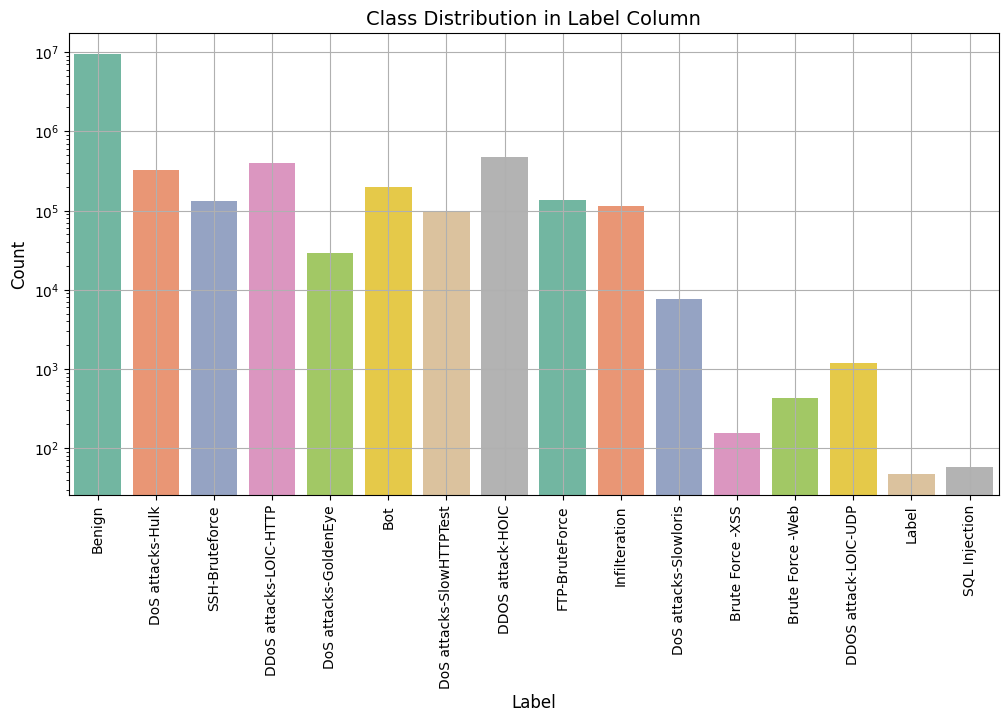

In [9]:
def plot_class_distribution_(data, column='Label'):
    plt.rcParams.update({'font.size': 8})
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=data, palette='Set2')
    plt.title(f"Class Distribution in {column} Column", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.tick_params(axis='both', labelsize=10)
    plt.yscale('log')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

plot_class_distribution_(train_data)


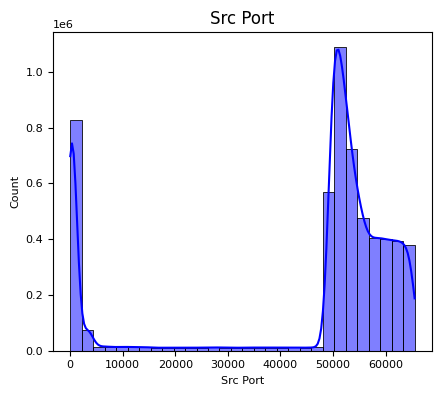

In [10]:
def plot_numeric_feature_distribution(data, numeric_features, cols=6):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    rows = (len(numeric_features) + cols - 1) // cols
    plt.figure(figsize=(cols * 4, rows * 4))
    
    for idx, feature in enumerate(numeric_features, 1):
        plt.subplot(rows, cols, idx)
        sns.histplot(data[feature], kde=True, bins=30, color='blue')
        plt.title(feature, fontsize=12)
        plt.tight_layout()
    
    plt.show()
    
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns
plot_numeric_feature_distribution(train_data, numeric_features, cols=6)


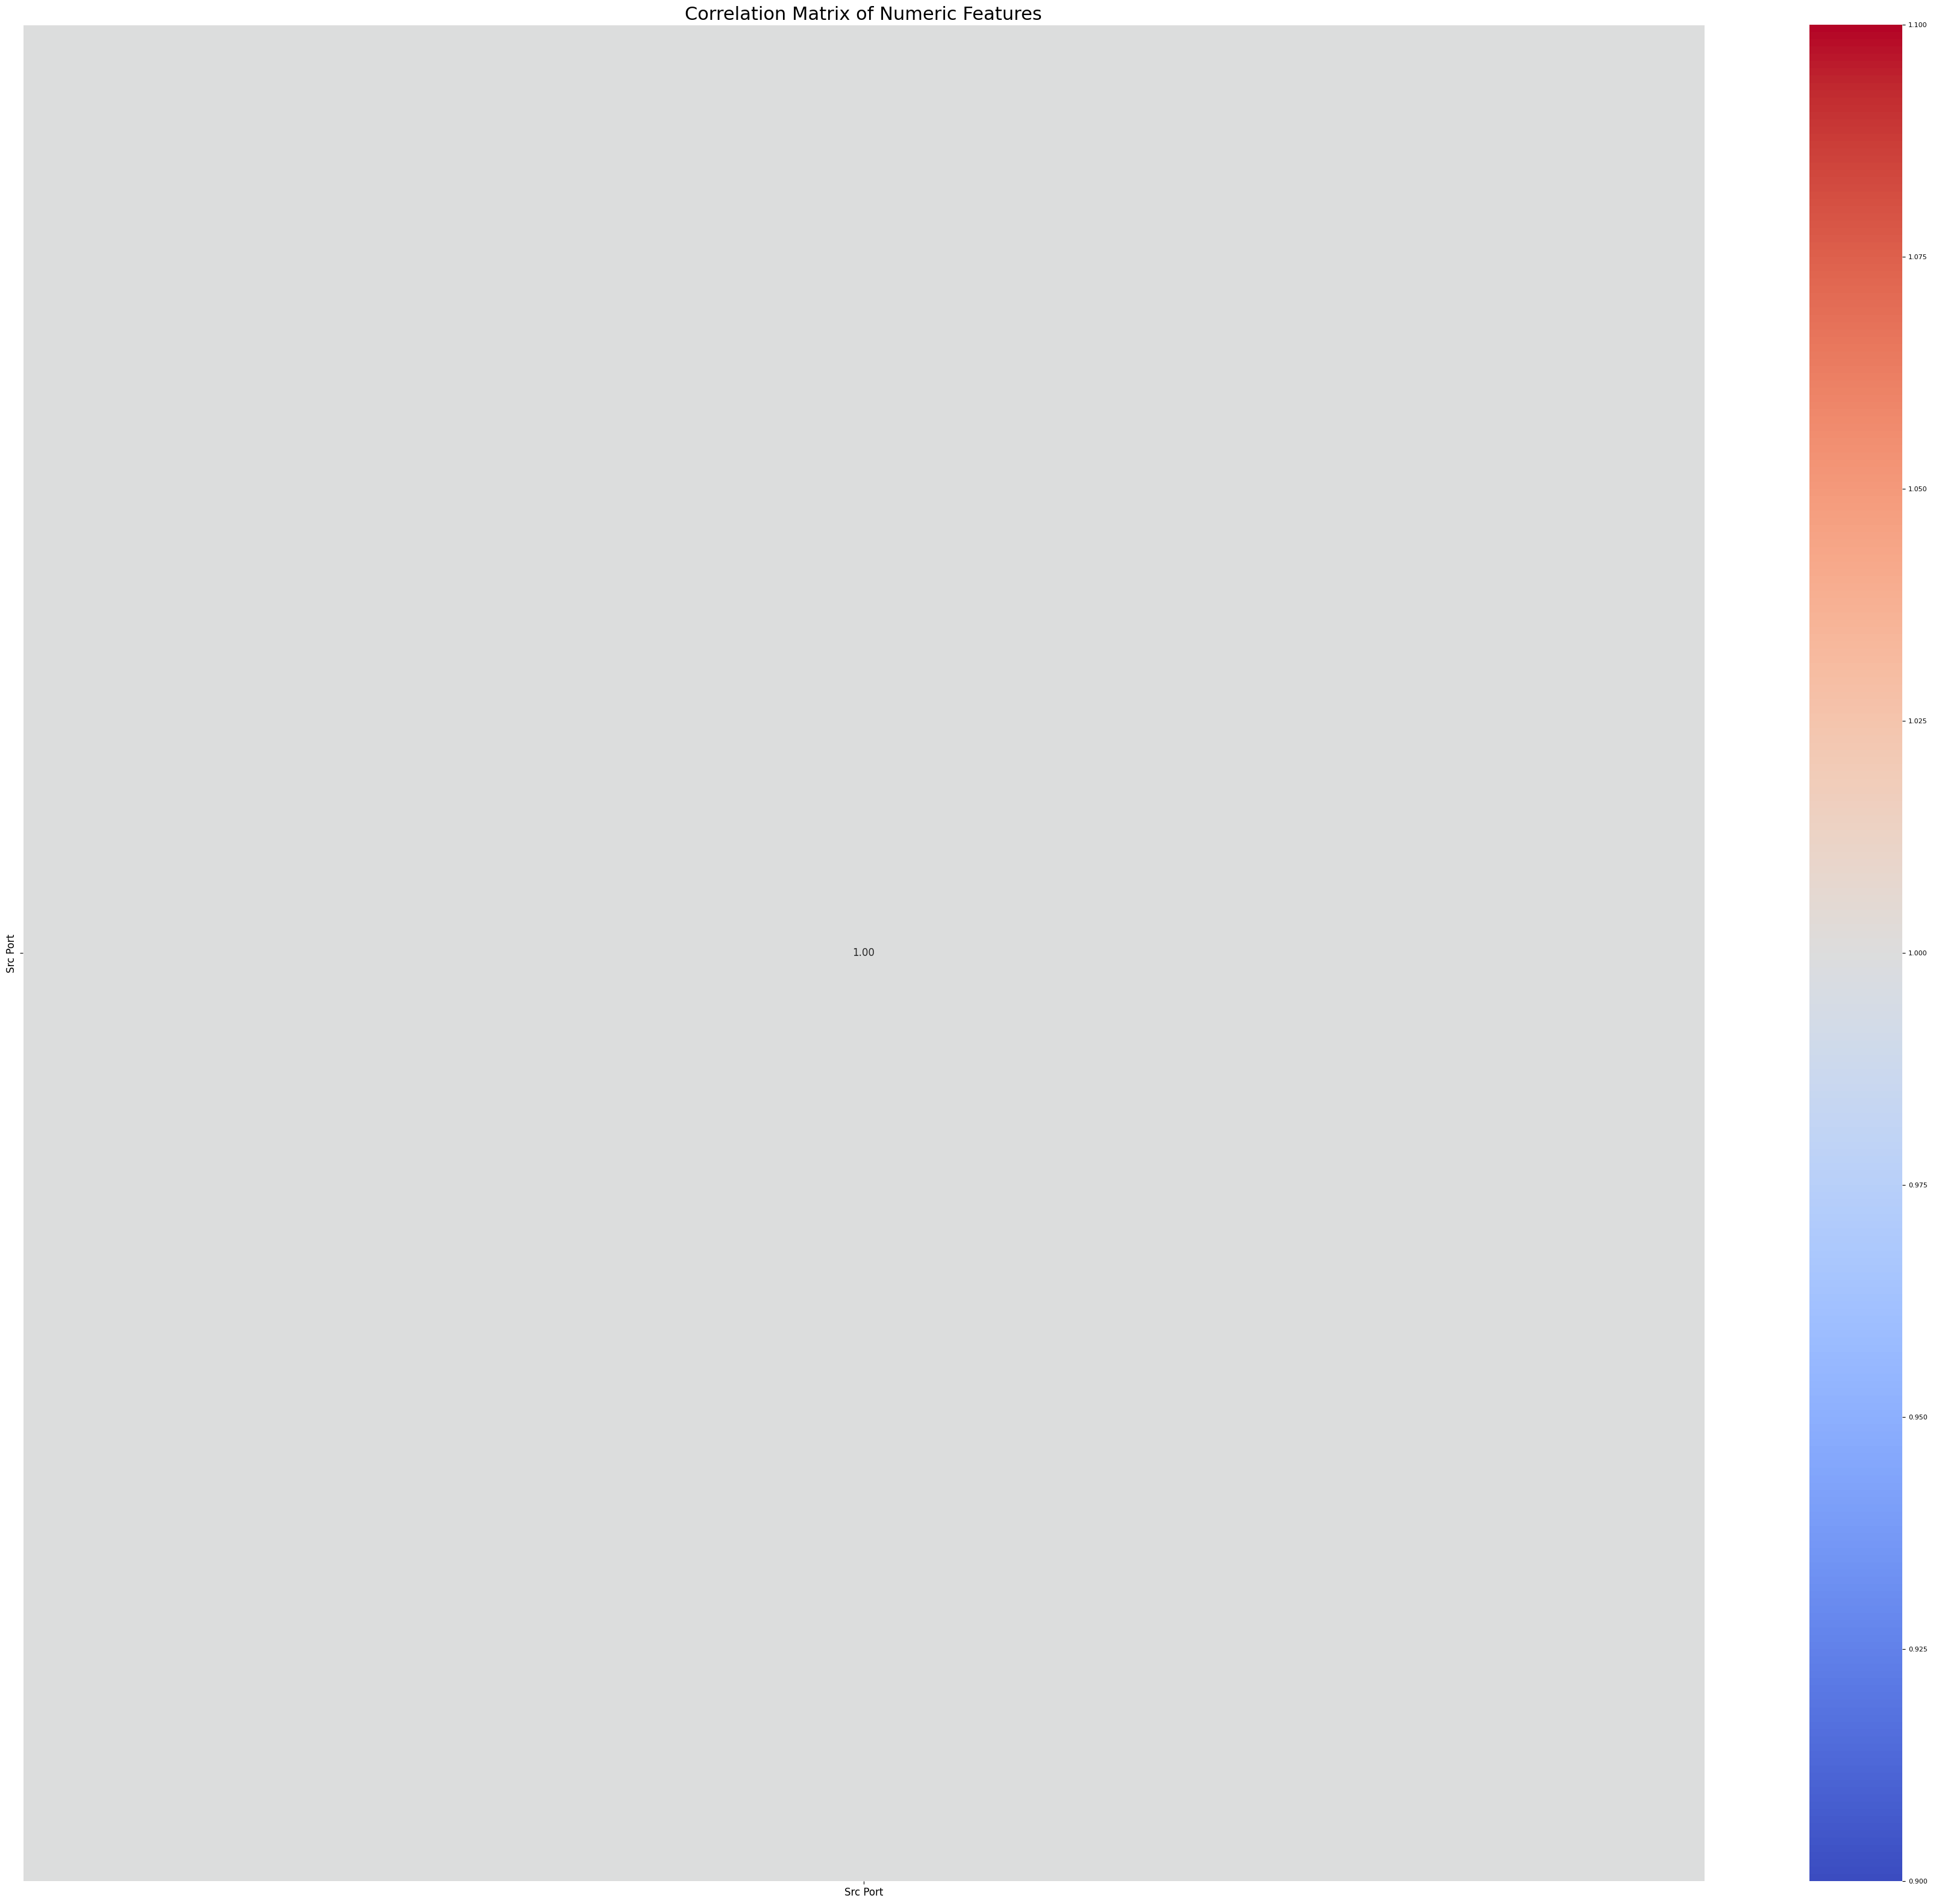

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_matrix(data, numeric_features):
    correlation_matrix = data[numeric_features].corr()
    plt.figure(figsize=(45, 40))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size":12})

    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.title("Correlation Matrix of Numeric Features", fontsize=22)
    plt.show()

plot_correlation_matrix(train_data, numeric_features)